<a href="https://colab.research.google.com/github/N-TarunSai/Bird-Species-Classification/blob/main/Bird_Species_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bird Species Classification | Deep Learning

## 1. Data Exploration and Visualization

In [ ]:
import os

#walk through the directory and list the numbers of files
for dirpath, dirnames, filenames in os.walk("/kaggle/input/100-bird-species"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 3 directories and 2 images in /kaggle/input/100-bird-species
There are 525 directories and 0 images in /kaggle/input/100-bird-species/valid
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/DALMATIAN PELICAN
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/BLACK BREASTED PUFFBIRD
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/WATTLED CURASSOW
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/AMERICAN WIGEON
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/CARMINE BEE-EATER
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/GAMBELS QUAIL
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/UMBRELLA BIRD
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/AMERICAN KESTREL
There are 0 directories and 5 images in /kaggle/input/100-bird-species/valid/AMERICAN GOLDFINCH


##### How many classes do we have?

In [ ]:
num_of_bird_groups = len(os.listdir("/kaggle/input/100-bird-species/train"))
num_of_bird_groups

525

##### What are the class names?

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("/kaggle/input/100-bird-species/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # creating a list of class names from subdirectory
print(class_names)

['ABBOTTS BABBLER' 'ABBOTTS BOOBY' 'ABYSSINIAN GROUND HORNBILL'
 'AFRICAN CROWNED CRANE' 'AFRICAN EMERALD CUCKOO' 'AFRICAN FIREFINCH'
 'AFRICAN OYSTER CATCHER' 'AFRICAN PIED HORNBILL' 'AFRICAN PYGMY GOOSE'
 'ALBATROSS' 'ALBERTS TOWHEE' 'ALEXANDRINE PARAKEET' 'ALPINE CHOUGH'
 'ALTAMIRA YELLOWTHROAT' 'AMERICAN AVOCET' 'AMERICAN BITTERN'
 'AMERICAN COOT' 'AMERICAN DIPPER' 'AMERICAN FLAMINGO'
 'AMERICAN GOLDFINCH' 'AMERICAN KESTREL' 'AMERICAN PIPIT'
 'AMERICAN REDSTART' 'AMERICAN ROBIN' 'AMERICAN WIGEON'
 'AMETHYST WOODSTAR' 'ANDEAN GOOSE' 'ANDEAN LAPWING' 'ANDEAN SISKIN'
 'ANHINGA' 'ANIANIAU' 'ANNAS HUMMINGBIRD' 'ANTBIRD' 'ANTILLEAN EUPHONIA'
 'APAPANE' 'APOSTLEBIRD' 'ARARIPE MANAKIN' 'ASHY STORM PETREL'
 'ASHY THRUSHBIRD' 'ASIAN CRESTED IBIS' 'ASIAN DOLLARD BIRD'
 'ASIAN GREEN BEE EATER' 'ASIAN OPENBILL STORK' 'AUCKLAND SHAQ'
 'AUSTRAL CANASTERO' 'AUSTRALASIAN FIGBIRD' 'AVADAVAT' 'AZARAS SPINETAIL'
 'AZURE BREASTED PITTA' 'AZURE JAY' 'AZURE TANAGER' 'AZURE TIT'
 'BAIKAL TEAL' 'BALD EAGLE

##### A function to visualize images randomly

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

Image shape: (224, 224, 3)


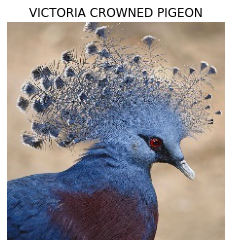

In [ ]:
img = view_random_image(target_dir = "/kaggle/input/100-bird-species/train/",
                        target_class = "VICTORIA CROWNED PIGEON") # or we can write nike instead of converse to see converse examples

In [ ]:
import tensorflow as tf
img.shape #(width, height, colour channels)

(224, 224, 3)

##### More visualization :D

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


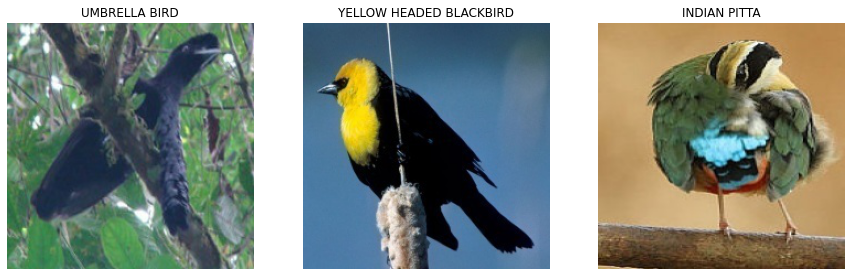

In [ ]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image("/kaggle/input/100-bird-species/train/", "UMBRELLA BIRD")
plt.subplot(1,3,2)
pizza_image = view_random_image("/kaggle/input/100-bird-species/train/", "YELLOW HEADED BLACKBIRD")
plt.subplot(1,3,3)
pizza_image = view_random_image("/kaggle/input/100-bird-species/train/", "INDIAN PITTA")

## 2. Data Preprocessing

In [ ]:
import matplotlib.pyplot as plt
import pathlib, os, random
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [ ]:
train_dir = "/kaggle/input/100-bird-species/train/"
test_dir = "/kaggle/input/100-bird-species/test/"
val_dir = "/kaggle/input/100-bird-species/valid/"

In [ ]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")


Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


## 3. Model Creation and Compilation

In [ ]:
import tensorflow as tf

# Create a base model with tf.keras.applications
base_model = tf.keras.applications.InceptionV3(include_top=False, weights=None)

# Load the locally downloaded weights file
weights_path = '/kaggle/input/weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model.load_weights(weights_path)

# Freeze the base model
base_model.trainable = False

# Create inputs into models
inputs = tf.keras.layers.Input(shape=(300, 300, 3), name="input-layer")

# Pass the inputs
x = base_model(inputs)
print(f"Shape after passing inputs through the base model: {x.shape}")

# Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# Create the output activation layer
outputs = tf.keras.layers.Dense(525, activation="softmax", name="output-layer")(x)

# Combine the inputs with outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# Compile the model
model_0.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

Shape after passing inputs through the base model: (None, 8, 8, 2048)
Shape after GlobalAveragePooling2D: (None, 2048)


## 4. Model Training

In [ ]:
# Train the model
history = model_0.fit(train_data,
                                 epochs=100,
                                 steps_per_epoch = len(train_data),
                                 validation_data = val_data,
                                 validation_steps = int(0.25*len(val_data)),)
model_0.summary()

# Evaluate the model
model_0.evaluate(test_data)

Epoch 1/100
2645/2645 [==============================] - 266s 99ms/step - loss: 10.6121 - accuracy: 0.4807 - val_loss: 7.2511 - val_accuracy: 0.6469
Epoch 2/100
2645/2645 [==============================] - 251s 95ms/step - loss: 7.6699 - accuracy: 0.6716 - val_loss: 6.3981 - val_accuracy: 0.7422
Epoch 3/100
2645/2645 [==============================] - 263s 99ms/step - loss: 6.4658 - accuracy: 0.7345 - val_loss: 6.7911 - val_accuracy: 0.7531
Epoch 4/100
2645/2645 [==============================] - 251s 95ms/step - loss: 5.6215 - accuracy: 0.7740 - val_loss: 6.3227 - val_accuracy: 0.7484
Epoch 5/100
2645/2645 [==============================] - 259s 98ms/step - loss: 4.9675 - accuracy: 0.8023 - val_loss: 5.9417 - val_accuracy: 0.8016
Epoch 6/100
2645/2645 [==============================] - 254s 96ms/step - loss: 4.3520 - accuracy: 0.8252 - val_loss: 6.7273 - val_accuracy: 0.7812
Epoch 7/100
2645/2645 [==============================] - 258s 98ms/step - loss: 3.9491 - accuracy: 0.8407 - val

[8.493343353271484, 0.8937143087387085]

## 5. Visualization of Training Results

In [ ]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

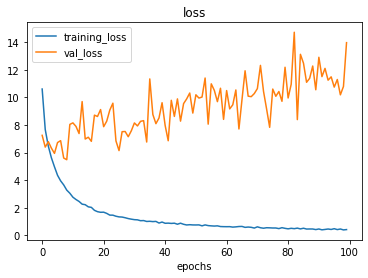

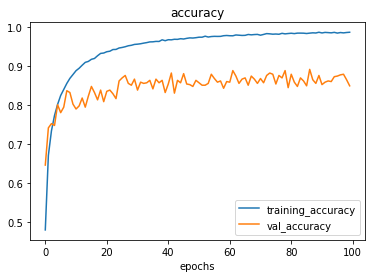

In [ ]:
plot_loss_curves(history)

## 6. Fine-Tuning

In [ ]:
# To begin fine-tuning lets start by setting the last 10 layers as trainable

base_model.trainable = True

# Un-freeze last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to compile model every time there is a change)
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), # when fine-tuning you typically want to lower lr by 10x
                 metrics = ["accuracy"] )

In [ ]:
# Check which layers are trainable
for layer_number, layer in enumerate(model_0.layers[1].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 conv2d_94 False
2 batch_normalization_94 False
3 activation_94 False
4 conv2d_95 False
5 batch_normalization_95 False
6 activation_95 False
7 conv2d_96 False
8 batch_normalization_96 False
9 activation_96 False
10 max_pooling2d_4 False
11 conv2d_97 False
12 batch_normalization_97 False
13 activation_97 False
14 conv2d_98 False
15 batch_normalization_98 False
16 activation_98 False
17 max_pooling2d_5 False
18 conv2d_102 False
19 batch_normalization_102 False
20 activation_102 False
21 conv2d_100 False
22 conv2d_103 False
23 batch_normalization_100 False
24 batch_normalization_103 False
25 activation_100 False
26 activation_103 False
27 average_pooling2d_9 False
28 conv2d_99 False
29 conv2d_101 False
30 conv2d_104 False
31 conv2d_105 False
32 batch_normalization_99 False
33 batch_normalization_101 False
34 batch_normalization_104 False
35 batch_normalization_105 False
36 activation_99 False
37 activation_101 False
38 activation_104 False
39 activation_105 False
40 mixed

In [ ]:
# Now we have unfrozen some of the layers on the top
print(len(model_0.trainable_variables))

3


In [ ]:
initial_epochs = 100
fine_tune_epochs = initial_epochs + 30

# Refit the model
history_2 = model_0.fit(train_data,
                       epochs = fine_tune_epochs,
                       validation_data = val_data,
                       validation_steps = int(0.25*len(val_data)),
                       initial_epoch =  history.epoch[-1],) # Start the epoch where it left before

Epoch 100/130
2645/2645 [==============================] - 239s 89ms/step - loss: 0.0942 - accuracy: 0.9957 - val_loss: 10.7590 - val_accuracy: 0.8781
Epoch 101/130
2645/2645 [==============================] - 243s 92ms/step - loss: 0.0078 - accuracy: 0.9994 - val_loss: 9.0309 - val_accuracy: 0.9062
Epoch 102/130
2645/2645 [==============================] - 245s 93ms/step - loss: 0.0031 - accuracy: 0.9997 - val_loss: 10.1806 - val_accuracy: 0.8828
Epoch 103/130
2645/2645 [==============================] - 230s 87ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 10.6897 - val_accuracy: 0.8781
Epoch 104/130
2645/2645 [==============================] - 237s 90ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 9.6719 - val_accuracy: 0.8750
Epoch 105/130
2645/2645 [==============================] - 247s 94ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 10.6712 - val_accuracy: 0.8687
Epoch 106/130
2645/2645 [==============================] - 235s 89ms/step - loss: 0.0013 - accur

In [ ]:
model_0.evaluate(test_data)

83/83 [==============================] - 11s 138ms/step - loss: 6.1683 - accuracy: 0.9105


[6.16834020614624, 0.9104762077331543]

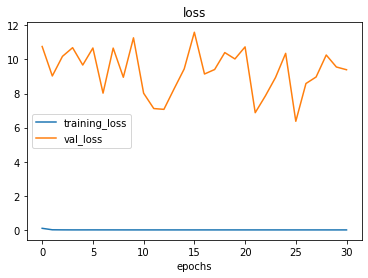

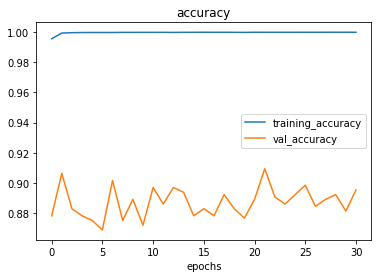

In [ ]:
plot_loss_curves(history_2)

In [ ]:
model_0.save('Final_DL_Model.h5')